In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.stats import gaussian_kde
import seaborn as sns
import statsmodels.api as sm

In [2]:
from doe_modules.simulation import Sim1, Circuit, Sparse, TheoreticalEffects, Test9, MLR
from doe_modules.design import FullFactorial, CLOO, PlackettBurman
from doe_modules.simulation.preset_edge_arr import *
from doe_modules.preferences import outputdir, kwarg_savefig

In [3]:
def residual_plot(
    gt: TheoreticalEffects,
    simulator,
    n_rep: int,
    figsize: tuple = None,
    title: str = "",
    kwargs_scatter: dict = dict(s=5, alpha=.5, cmap="managua_r", rasterized=True),
    kwargs_cbar: dict = dict(
        orientation="vertical", fraction=0.046,
        pad=0.04, aspect=10, shrink=0.9, 
        label="Relative Density"
    )
):
    fig, ax = plt.subplots(figsize=figsize)
    beta = np.append(gt.mu.mean(), gt.result.groupby("term").mean().values.ravel())
    simulator.simulate(design=FullFactorial, n_rep=n_rep)
    
    x = sm.add_constant(model.exmatrix.values) @ beta
    y = model.exresult - sm.add_constant(model.exmatrix.values) @ beta
    z = gaussian_kde(y)(y)
    idx = z.argsort()

    sc = ax.scatter(x[idx], y[idx], c=(z / z.max())[idx], **kwargs_scatter)
    cbar = fig.colorbar(sc, ax=ax, **kwargs_cbar)
    
    axis_fmt = ScalarFormatter(useMathText=True)
    axis_fmt.set_powerlimits((-2, 4))

    ax.xaxis.set_major_formatter(axis_fmt)
    ax.yaxis.set_major_formatter(axis_fmt)

    ax.set_title(title, fontsize="medium")
    ax.set(xlabel="Predicted output values", ylabel="Raw Residuals")

    return fig, ax

In [4]:
model = Sim1()
key = "sim1"

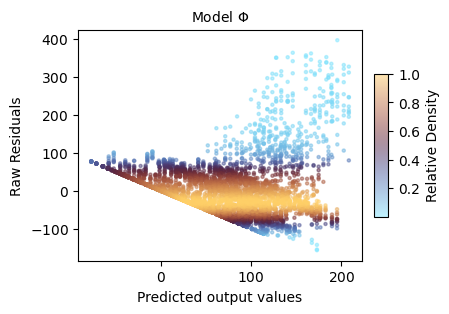

In [5]:
gt = TheoreticalEffects(simulation=model)

fig, ax = residual_plot(
    gt, model, n_rep=10, figsize=(4, 3), 
    title=model.name
)

fig.savefig(f"{outputdir}/{key}_residual_plot.pdf", **kwarg_savefig)

In [6]:
model = Circuit()
key = "circuit"

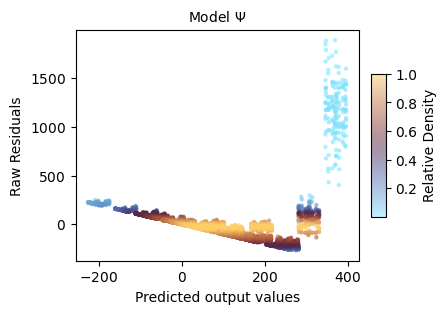

In [7]:
gt = TheoreticalEffects(simulation=model)

fig, ax = residual_plot(
    gt, model, n_rep=10, figsize=(4, 3), 
    title=model.name
)

fig.savefig(f"{outputdir}/{key}_residual_plot.pdf", **kwarg_savefig)

In [8]:
model = Test9(edge_assignment=model_delta_arr)
key = "delta"
title = "Model $\Delta$"

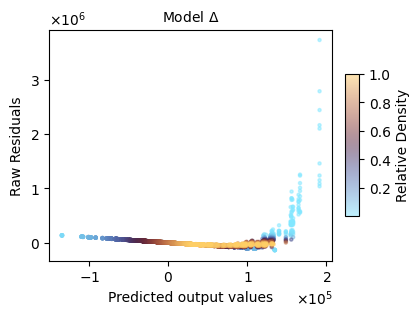

In [9]:
gt = TheoreticalEffects(simulation=model)

fig, ax = residual_plot(
    gt, model, n_rep=10, figsize=(4, 3), 
    title=title
)

fig.savefig(f"{outputdir}/{key}_residual_plot.pdf", **kwarg_savefig)

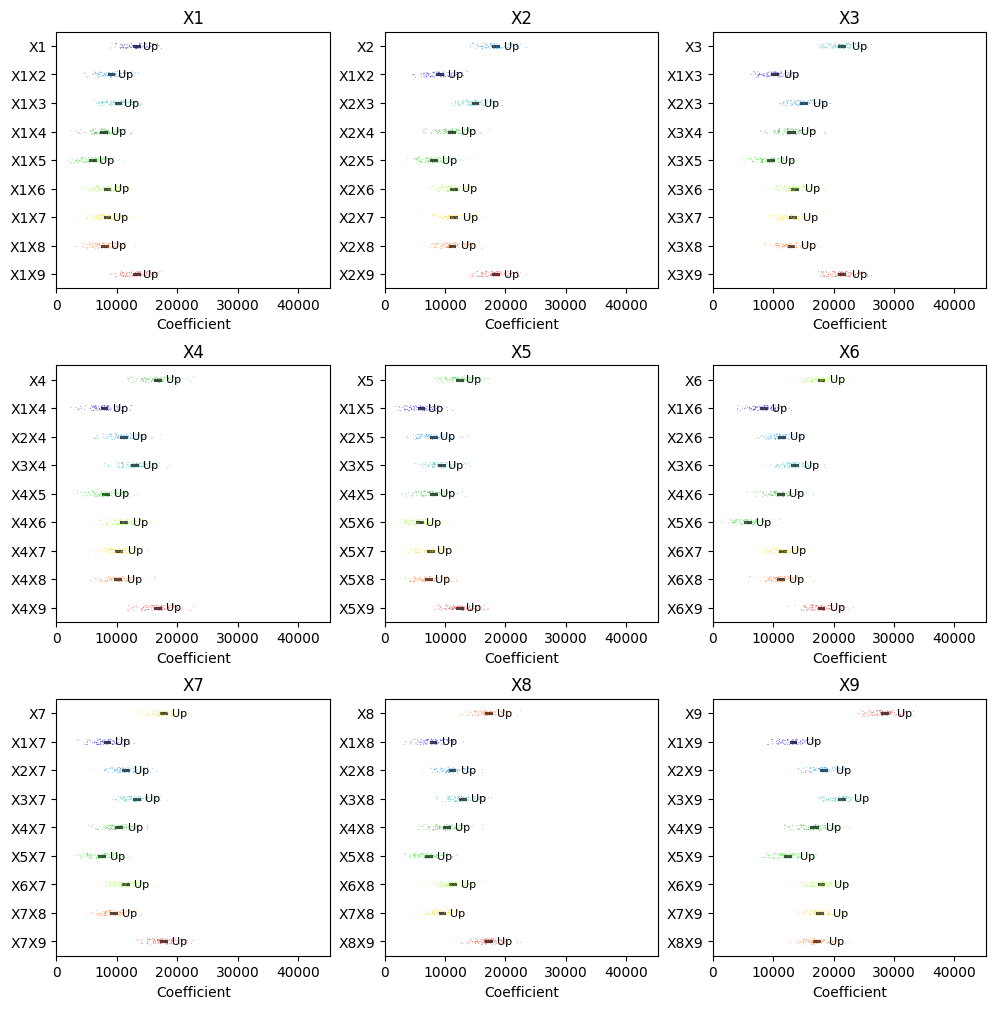

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

gt2 = TheoreticalEffects(simulation=model, interactions=True, order=2)

for i, a in enumerate(ax.ravel()):
    cmap=model.cmap.copy()
    gt2.plot(
        ax=a, cmap=[cmap.pop(i)]+cmap, regex=f"X{i + 1}", 
        jitter_ratio=.06, xscales=np.array([1.6, 1.3]), 
        # **kwarg_err
    )
    a.set_title(f"X{i + 1}")

common_xlim = np.abs(
    np.array([a.get_xlim() for a in ax.ravel()])
).max(axis=0) * np.array([-1, 1])

[a.set_xlim(common_xlim) for a in ax.ravel()];

# fig.suptitle(
#     f"{model.metadata['design']}-based second-order model for {model.name} (N={model.metadata['n_rep']})", 
#     y=.93
# );

# if conf.savefig:
#     fig.savefig(f"{conf.out}/groundtrue_results_2nd_order{conf.suffix}", **kwarg_savefig)

In [11]:
model = Test9(edge_assignment=model_pi_arr)
key = "pi"
title = "Model $\Pi$"

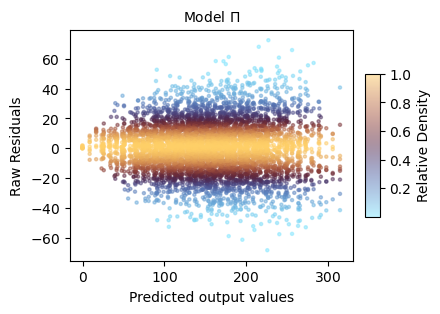

In [12]:
gt = TheoreticalEffects(simulation=model)

fig, ax = residual_plot(
    gt, model, n_rep=10, figsize=(4, 3), 
    title=title
)

fig.savefig(f"{outputdir}/{key}_residual_plot.pdf", **kwarg_savefig)

In [13]:
model = Test9(edge_assignment=model_sigma_arr)
key = "sigma"
title = "Model $\Sigma$"

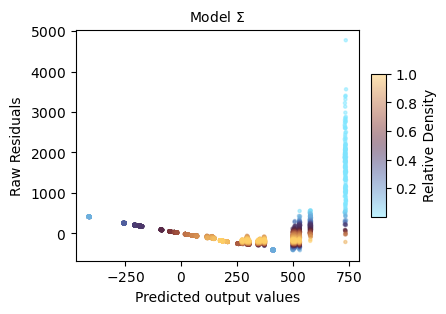

In [14]:
gt = TheoreticalEffects(simulation=model)

fig, ax = residual_plot(
    gt, model, n_rep=10, figsize=(4, 3), 
    title=title
)

fig.savefig(f"{outputdir}/{key}_residual_plot.pdf", **kwarg_savefig)